# Build Neural Network Models Using Numpy

## Boston Home Price Forecasting Task

### Data Processing

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

datafile = './housing.data'
data = np.fromfile(datafile, sep = ' ')
feature_names = ['CRIM', 'zn', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
ratio = 0.8

In [61]:
def load_data(data, feature_names, ratio):
    feature_num = len(feature_names)

    # reshape the data into [N, 14]
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # calculate the maximums, minimums, and averages for every column
    maximums = data.max(axis = 0)
    minimums = data.min(axis = 0)
    avgs = data.sum(axis = 0) / data.shape[0]

    print(data)
    # normalize the data into [0, 1]
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # spilt the data into training data(80%) and testing data(20%)
    offset = int(data.shape[0] * ratio)
    train_data = data[: offset]
    test_data = data[offset : -1]

    return train_data, test_data

## Build Network

In [62]:
class Network:
    def __init__(self, num_of_weights):
        # generate w in random
        # set a fixed random seed so that the algorithm can get same results
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0

    # Forward calculation
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    # Loss function
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / (2 * num_samples)
        return cost

    # Calculate gradients
    def gradient(self, x, y, z):
        gradient_w = (z - y) * x
        gradient_w = np.mean(gradient_w, axis = 0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)

        return gradient_w, gradient_b

    # Update w and b
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - gradient_w * eta
        self.b = self.b - gradient_b * eta

    def train(self, x, y, iter = 1000, eta = 0.01):
        losses = []
        for i in range(iter):
            z = self.forward(x)
            gradient_w, gradient_b = self.gradient(x, y, z)
            self.update(gradient_w, gradient_b, eta)
            # Generate loss list for printing
            L = self.loss(z, y)
            losses.append(L)
            if i % 10 == 0:
                print('iteration {}, loss {}'.format(i, L))

        return losses

## Main

In [63]:
train_data, test_data = load_data(data, feature_names, 0.8)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


iteration 0, loss 4.283994147378152
iteration 10, loss 2.4018185216517804
iteration 20, loss 1.471690922409947
iteration 30, loss 1.0066545055667522
iteration 40, loss 0.7690836464038121
iteration 50, loss 0.6430083380516992
iteration 60, loss 0.5718184070885777
iteration 70, loss 0.5278679702639161
iteration 80, loss 0.4976447176272886
iteration 90, loss 0.4745336171406072
iteration 100, loss 0.4552861063831305
iteration 110, loss 0.438297275359278
iteration 120, loss 0.4227652106096489
iteration 130, loss 0.4082807679373227
iteration 140, loss 0.3946273633792292
iteration 150, loss 0.3816832392585768
iteration 160, loss 0.36937373253055905
iteration 170, loss 0.3576479426768978
iteration 180, loss 0.34646730689096794
iteration 190, loss 0.33579998719338827
iteration 200, loss 0.32561809530990504
iteration 210, loss 0.31589630404660946
iteration 220, loss 0.3066111369605542
iteration 230, loss 0.29774059068557784
iteration 240, loss 0.2892639211797294
iteration 250, loss 0.28116151148

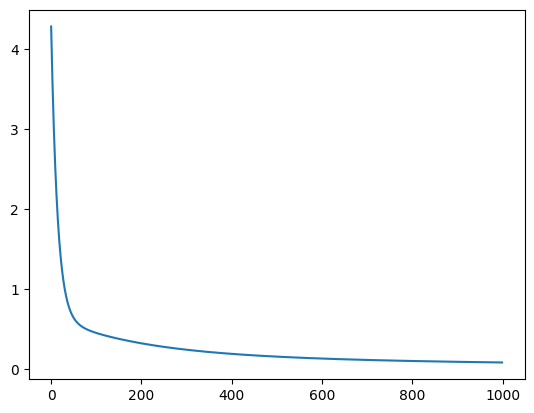

In [65]:
x = train_data[:, : -1]
y = train_data[:, -1 :]

iteration = 1000
net = Network(13)
losses = net.train(x, y, iter = iteration, eta = 0.01)

plot_x = np.arange(iteration)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()